# Data Cleaning

## Goals

- Examine data for potential issues
- Identify and fill in missing values
- Identify and correct incorrect values
- Remove low variance columns
- Identify potential outliers
- Correct incorrect data types
- Remove special characters and clean categorical variables
- Identify and remove duplicate records

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../week_5/pandas_import_export/data/vehicles_messy.csv')

data.head()

/home/ubuntu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## Null Values

In [3]:
data.isnull()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37839,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37840,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37841,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False


In [4]:
data.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [5]:
data.isnull().sum() > 0

barrels08     False
barrelsA08    False
charge120     False
charge240     False
city08        False
              ...  
modifiedOn    False
startStop      True
phevCity      False
phevHwy       False
phevComb      False
Length: 83, dtype: bool

In [6]:
null_cols = data.isnull().sum()

null_cols[null_cols > 0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [7]:
null_cols[null_cols > 0] / len(data) * 100

cylinders      0.325027
displ          0.317100
drive          3.141928
eng_dscr      40.702376
trany          0.029067
guzzler       93.972465
trans_dscr    60.238353
tCharger      86.296012
sCharger      98.240097
atvType       91.882250
fuelType2     96.279365
rangeA        96.292577
evMotor       98.514917
mfrCode       81.436461
c240Dscr      99.902228
c240bDscr     99.904870
startStop     83.780356
dtype: float64

In [8]:
!pip install missingno

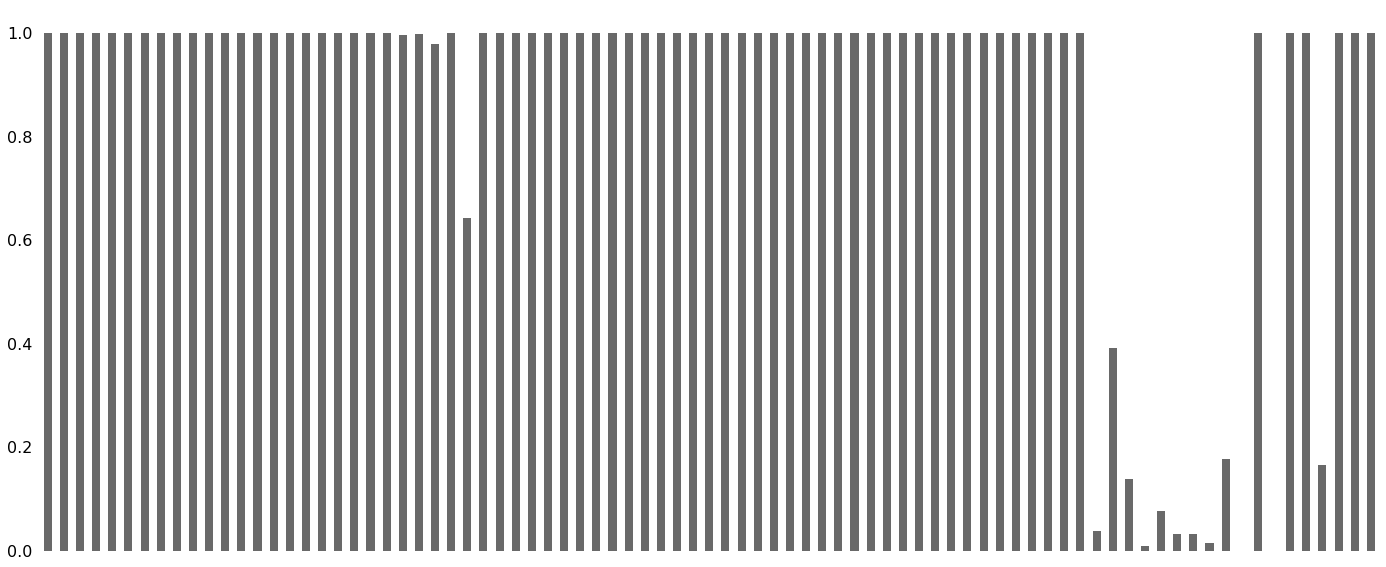

In [9]:
import missingno

%matplotlib inline

# it is necessary to sample data since otherwise the plot would be over-populated 
sample_data = data.sample(500, random_state=42)
missingno.bar(sample_data);

Summary:

- each column represents a dataframe column
- the smaller the bar the more null values in the column

In [10]:
len(sample_data.columns)

83

In [11]:
sample_data.iloc[:,0].isnull().sum()

0

In [12]:
sample_data.iloc[:,78].isnull().sum()

0

In [13]:
sample_data.iloc[:,76].isnull().sum()

500

In [14]:
threshold = 40

null_cols = null_cols[null_cols > 0] / len(data) * 100
null_filter = null_cols > threshold

drop_cols = list(null_cols[null_filter].index)

drop_cols

['eng_dscr',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'startStop']

### Different ways of drop null columns

In [15]:
# read data again each time to recover original dataset
data = pd.read_csv('../../week_5/pandas_import_export/data/vehicles_messy.csv')

/home/ubuntu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# First approach
data_1 = data[[x for x in data.columns if x not in drop_cols]]

len(data_1.columns)

70

In [17]:
# Second approach
data_2 = data.drop(drop_cols, axis=1)

len(data_2.columns)

70

In [18]:
# Third approach
data.drop(drop_cols, axis=1, inplace=True)

len(data.columns)

70

### Fill null values

Techniques to fill null values:

- 0s
- Mean, Median, Mode
- predictive methods

In [19]:
null_displ = data[data['displ'].isnull()]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ
7138,2000,Nissan,Altra EV,NaN,NaN,Electricity,NaN,NaN
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8144,2001,Ford,Th!nk,NaN,NaN,Electricity,NaN,NaN
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Electricity,NaN,NaN
...,...,...,...,...,...,...,...,...
30969,2017,Kia,Soul Electric,Automatic (A1),Front-Wheel Drive,Electricity,NaN,NaN
30972,2016,Tesla,Model S (60 kW-hr battery pack),Automatic (A1),Rear-Wheel Drive,Electricity,NaN,NaN
30973,2016,Tesla,Model S AWD - 60D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN
30974,2016,Tesla,Model S AWD - P100D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN


In [20]:
# as expected electric cars do not have cylinders nor displacement
data[['displ', 'cylinders']] = data[['displ', 'cylinders']].fillna(0)

In [21]:
null_displ = data[data['displ'].isnull()]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ


In [22]:
null_displ = data[data['displ'] == 0]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,trany,drive,fuelType,cylinders,displ
7138,2000,Nissan,Altra EV,NaN,NaN,Electricity,0.0,0.0
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,0.0,0.0
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,0.0,0.0
8144,2001,Ford,Th!nk,NaN,NaN,Electricity,0.0,0.0
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Electricity,0.0,0.0
...,...,...,...,...,...,...,...,...
30969,2017,Kia,Soul Electric,Automatic (A1),Front-Wheel Drive,Electricity,0.0,0.0
30972,2016,Tesla,Model S (60 kW-hr battery pack),Automatic (A1),Rear-Wheel Drive,Electricity,0.0,0.0
30973,2016,Tesla,Model S AWD - 60D,Automatic (A1),All-Wheel Drive,Electricity,0.0,0.0
30974,2016,Tesla,Model S AWD - P100D,Automatic (A1),All-Wheel Drive,Electricity,0.0,0.0


## Incorrect Values

In [28]:
test = data[(data['cylinders']==0) & (data['displ']!=0)]
test[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]

,year,make,model,trany,drive,fuelType,cylinders,displ


To fill this cylinders value, we could ask an expert or fill with similar values encountered on the dataset. If no relation is found, just drop this record

In [26]:
# example on how to fill a value: loc[condition, column]
data.loc[(data['cylinders']==0) & (data['displ']!=0), 'cylinders'] = 4

In [27]:
data[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']].iloc[21506]

year                     1986
make                    Mazda
model                    RX-7
trany            Manual 5-spd
drive        Rear-Wheel Drive
fuelType              Regular
cylinders                   4
displ                     1.3
Name: 21506, dtype: object

## Low Variance Columns

In [41]:
# data[[x for x in data.columns if x not in data._get_numeric_data().columns]]
# data.drop(data._get_numeric_data().columns, axis=1)
data._get_numeric_data()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-1250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-8500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,500,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-8500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-4000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-750,0.0,0,0,0
37839,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-500,0.0,0,0,0
37840,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1250,0.0,0,0,0
37841,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-1250,0.0,0,0,0


In [42]:
import numpy as np

low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    maximum = max(data[col])
    
    ten_perc = np.percentile(data[col], 10)
    ninety_perc = np.percentile(data[col], 90)
    
    if ten_perc == maximum or ninety_perc == minimum:
        low_variance.append(col)

low_variance

['barrelsA08',
 'charge120',
 'charge240',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2A',
 'co2TailpipeAGpm',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'fuelCostA08',
 'ghgScoreA',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'phevBlended',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [43]:
data.drop(low_variance, axis=1, inplace=True)

## Outliers

A common method for identifying outliers is one that leverages the interquartile range (IQR). Once the IQR is calculated, it is multiplied by a constant (typically 1.5) and lower and upper bounds are established at:

- 25th Percentile - (IQR x 1.5)
- 75th Percentile + (IQR x 1.5)

Any values outside this range are potential outliers and should be investigated.

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
co2,37843.0,61.503713,153.387715,-1.00,-1.00000,-1.000000,-1.000000,847.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000
comb08U,37843.0,4.549751,10.389994,0.00,0.00000,0.000000,0.000000,124.360100
cylinders,37843.0,5.719446,1.778959,0.00,4.00000,6.000000,6.000000,16.000000
displ,37843.0,3.307658,1.371982,0.00,2.20000,3.000000,4.300000,8.400000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000


In [46]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
co2,37843.0,61.503713,153.387715,-1.00,-1.00000,-1.000000,-1.000000,847.000000,0.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429,167.437500
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000,6.000000
comb08U,37843.0,4.549751,10.389994,0.00,0.00000,0.000000,0.000000,124.360100,0.000000
cylinders,37843.0,5.719446,1.778959,0.00,4.00000,6.000000,6.000000,16.000000,2.000000
displ,37843.0,3.307658,1.371982,0.00,2.20000,3.000000,4.300000,8.400000,2.100000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000,4505.000000


In [47]:
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    
outliers

/home/ubuntu/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Outlier,UCity,UHighway,VClass,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,...,lv4,make,model,modifiedOn,mpgData,pv2,pv4,trany,year,youSaveSpend
47,barrels08,11.0000,15.0,Vans,32.961000,9,0.0,-1,888.700000,10,...,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 3-spd,1985,-10000
58,barrels08,12.0000,15.0,Vans,32.961000,10,0.0,-1,888.700000,10,...,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 3-spd,1985,-10000
69,barrels08,12.0000,15.0,Vans,32.961000,10,0.0,-1,888.700000,10,...,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 3-spd,1985,-10000
80,barrels08,11.0000,14.0,Vans,32.961000,9,0.0,-1,888.700000,10,...,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 3-spd,1985,-10000
275,barrels08,11.0000,16.0,Standard Pickup Trucks,32.961000,9,0.0,-1,888.700000,10,...,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 4-spd,1993,-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37475,youSaveSpend,8.0000,14.0,Two Seaters,41.201250,7,0.0,-1,1110.875000,8,...,0,Vector,W8,Tue Jan 01 00:00:00 EST 2013,N,0,0,Automatic 3-spd,1993,-18500
37615,youSaveSpend,13.0000,20.0,Subcompact Cars,27.467500,11,0.0,-1,740.583333,12,...,0,Jaguar,XJRS Coupe,Tue Jan 01 00:00:00 EST 2013,N,77,0,Automatic 3-spd,1993,-10250
37672,youSaveSpend,11.1111,18.0,Subcompact Cars,29.964545,9,0.0,-1,807.909091,11,...,0,Rolls-Royce,Continental,Tue Jan 01 00:00:00 EST 2013,N,82,0,Automatic 4-spd,1993,-11750
37673,youSaveSpend,11.1111,18.0,Subcompact Cars,29.964545,9,0.0,-1,807.909091,11,...,0,Rolls-Royce,Corniche IV,Tue Jan 01 00:00:00 EST 2013,N,82,0,Automatic 4-spd,1993,-11750


### pyod

Out of scope at this moment, to investigate for those with finished labs

https://pyod.readthedocs.io/en/latest/

## Data Type Corrections

In [48]:
data.dtypes

barrels08         float64
city08              int64
city08U           float64
co2                 int64
co2TailpipeGpm    float64
comb08              int64
comb08U           float64
cylinders         float64
displ             float64
drive              object
engId               int64
feScore             int64
fuelCost08          int64
fuelType           object
fuelType1          object
ghgScore            int64
highway08           int64
highway08U        float64
hlv                 int64
hpv                 int64
id                  int64
lv2                 int64
lv4                 int64
make               object
model              object
mpgData            object
pv2                 int64
pv4                 int64
trany              object
UCity             float64
UHighway          float64
VClass             object
year                int64
youSaveSpend        int64
createdOn          object
modifiedOn         object
dtype: object

In [50]:
data['year'].value_counts().sort_index()

1984    1964
1985    1701
1986    1210
1987    1247
1988    1130
1989    1153
1990    1078
1991    1132
1992    1121
1993    1093
1994     982
1995     967
1996     773
1997     762
1998     812
1999     852
2000     840
2001     911
2002     975
2003    1044
2004    1122
2005    1166
2006    1104
2007    1126
2008    1187
2009    1184
2010    1109
2011    1130
2012    1153
2013    1185
2014    1226
2015    1283
2016    1258
2017     863
Name: year, dtype: int64

In [51]:
data['year'] = data['year'].astype('object')
data['year'].dtype

dtype('O')

## Cleaning Text and Removing Special Characters

In [52]:
print(set(data['trany']))
print(f'Initial records to process: {len(set(data["trany"]))}')

{nan, 'Auto (AV)', 'Manual 6-spd', 'Auto(AM-S6)', 'Auto (AV-S8)', 'Auto(AM8)', 'Auto(AM-S8)', 'Automatic 9-spd', 'Auto(AM6)', 'Auto(AM7)', 'Automatic 8-spd', 'Auto(L4)', 'Automatic (AV-S6)', 'Automatic (AM6)', 'Automatic (S6)', 'Auto (AV-S6)', 'Automatic (AV)', 'Manual 7-spd', 'Auto(AV-S7)', 'Auto(L3)', 'Auto(AV-S6)', 'Automatic (variable gear ratios)', 'Automatic 4-spd', 'Automatic (S7)', 'Manual 5 spd', 'Auto(AM-S9)', 'Manual 5-spd', 'Auto(AM-S7)', 'Automatic (A6)', 'Automatic (S9)', 'Automatic 6-spd', 'Automatic (A1)', 'Automatic 7-spd', 'Automatic 3-spd', 'Automatic (S5)', 'Auto(AV-S8)', 'Manual 3-spd', 'Automatic (AM5)', 'Automatic (S8)', 'Auto(AM5)', 'Manual(M7)', 'Manual 4-spd Doubled', 'Auto(A1)', 'Automatic (S4)', 'Automatic 5-spd', 'Manual 4-spd', 'Automatic 6spd'}
Initial records to process: 47


In [53]:
data['trany'] = data['trany'].str.replace('-', '')

print(set(data['trany']))
print(f'Unique values: {len(set(data["trany"]))}')

{nan, 'Auto(AVS7)', 'Auto (AV)', 'Manual 4spd Doubled', 'Auto(AMS9)', 'Auto(AM8)', 'Automatic 7spd', 'Auto(AM6)', 'Auto(AM7)', 'Manual 7spd', 'Auto(L4)', 'Automatic (AM6)', 'Automatic (S6)', 'Automatic (AV)', 'Automatic (AVS6)', 'Auto(AVS8)', 'Automatic 4spd', 'Auto(AVS6)', 'Automatic 3spd', 'Auto(L3)', 'Automatic (variable gear ratios)', 'Manual 5spd', 'Automatic (S7)', 'Manual 5 spd', 'Manual 3spd', 'Auto(AMS6)', 'Automatic (A6)', 'Automatic (S9)', 'Automatic (A1)', 'Manual 4spd', 'Automatic 5spd', 'Automatic 8spd', 'Auto(AMS8)', 'Automatic (S5)', 'Auto(AMS7)', 'Automatic (AM5)', 'Automatic (S8)', 'Auto (AVS6)', 'Auto(AM5)', 'Manual(M7)', 'Manual 6spd', 'Automatic 9spd', 'Auto(A1)', 'Automatic (S4)', 'Auto (AVS8)', 'Automatic 6spd'}
Unique values: 46


In [54]:
data['trany'] = data['trany'].str.replace('Automatic', 'Auto')
data['trany'] = data['trany'].str.replace('Auto\(', 'Auto ')
data['trany'] = data['trany'].str.replace('Manual\(', 'Manual ')
data['trany'] = data['trany'].str.replace('\(', '')
data['trany'] = data['trany'].str.replace('\)', '')

print(set(data['trany']))
print(f'Unique values: {len(set(data["trany"]))}')

{'Auto 3spd', nan, 'Manual 4spd Doubled', 'Auto AMS8', 'Auto L3', 'Auto S9', 'Auto L4', 'Auto AMS6', 'Auto AM5', 'Auto S7', 'Manual M7', 'Manual 7spd', 'Auto AM6', 'Auto 8spd', 'Auto variable gear ratios', 'Auto AMS9', 'Auto S6', 'Auto 6spd', 'Auto AVS6', 'Auto 7spd', 'Manual 5spd', 'Manual 5 spd', 'Auto AV', 'Manual 3spd', 'Auto AVS8', 'Auto A1', 'Auto AM8', 'Auto S5', 'Auto S4', 'Manual 4spd', 'Auto AVS7', 'Auto AMS7', 'Auto S8', 'Auto 4spd', 'Auto A6', 'Auto 9spd', 'Auto 5spd', 'Auto AM7', 'Manual 6spd'}
Unique values: 39


## Removing Duplicates

In [55]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print(f'Number of duplicate records dropped: {before - after}')

Number of duplicate records dropped: 0


In [56]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'trany', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

data = data[select_columns].drop_duplicates()
after = len(data)
print(f'Number of duplicate records dropped: {before - after}')

Number of duplicate records dropped: 885
